# Assignment 1

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install yahoo_fin

Note: you may need to restart the kernel to use updated packages.


# WIPRO (WIT)

## Extracting the stock price data for a specific duration 

In [6]:
from yahoo_fin.stock_info import get_data

In [24]:
wipro_weekly = get_data("wit", start_date="01/01/2021", end_date="11/01/2021", index_as_date=True, interval="1mo") #Getting the wipro stock price data  with interval of 1 Month
wipro_weekly.reset_index(inplace=True)  #Reseting the index of DataFrame
wipro_weekly.rename(columns={'index': 'timestamp'}, inplace=True)   #Renaming the index column of the DataFrame to timestamp
wipro_weekly

,timestamp,open,high,low,close,adjclose,volume,ticker
0,2021-01-01,5.78,6.72,5.67,6.15,6.060697,52174700,WIT
1,2021-02-01,6.28,6.74,6.10,6.13,6.053867,35344100,WIT
2,2021-03-01,6.26,6.76,6.17,6.34,6.261260,44592300,WIT
3,2021-04-01,6.41,7.36,6.09,7.16,7.071075,33654300,WIT
4,2021-05-01,7.17,7.98,7.07,7.93,7.831512,31478500,WIT
5,2021-06-01,7.97,8.32,7.75,7.81,7.713002,41219900,WIT
6,2021-07-01,7.75,8.60,7.48,8.33,8.226544,42733600,WIT
7,2021-08-01,8.40,9.40,8.39,9.34,9.224000,37641700,WIT
8,2021-09-01,9.35,9.80,8.81,8.83,8.720334,42461100,WIT
9,2021-10-01,8.91,9.96,8.71,8.96,8.848720,41803300,WIT


## finding the montly stock price changes and adding a new column to data set 

In [25]:
# Calculate monthly stock price changes
wipro_weekly['Monthly Changes'] = wipro_weekly['close'].diff().fillna(0)

# Print the DataFrame with weekly changes
print(wipro_weekly)


   timestamp  open  high   low  close  adjclose    volume ticker  \
0 2021-01-01  5.78  6.72  5.67   6.15  6.060697  52174700    WIT   
1 2021-02-01  6.28  6.74  6.10   6.13  6.053867  35344100    WIT   
2 2021-03-01  6.26  6.76  6.17   6.34  6.261260  44592300    WIT   
3 2021-04-01  6.41  7.36  6.09   7.16  7.071075  33654300    WIT   
4 2021-05-01  7.17  7.98  7.07   7.93  7.831512  31478500    WIT   
5 2021-06-01  7.97  8.32  7.75   7.81  7.713002  41219900    WIT   
6 2021-07-01  7.75  8.60  7.48   8.33  8.226544  42733600    WIT   
7 2021-08-01  8.40  9.40  8.39   9.34  9.224000  37641700    WIT   
8 2021-09-01  9.35  9.80  8.81   8.83  8.720334  42461100    WIT   
9 2021-10-01  8.91  9.96  8.71   8.96  8.848720  41803300    WIT   

   Monthly Changes  
0             0.00  
1            -0.02  
2             0.21  
3             0.82  
4             0.77  
5            -0.12  
6             0.52  
7             1.01  
8            -0.51  
9             0.13  


## Extracting the articles for the same duration Using Web Scraping

In [71]:
import requests
from bs4 import BeautifulSoup

def scrape_news_articles(company_name, start_date, end_date):
    try:
        # Define the URL for Reuters news search results
        url = f"https://www.reuters.com/search/news?blob={company_name}&dateRange={start_date}~{end_date}"

        # Send an HTTP GET request to fetch the search results page
        response = requests.get(url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the HTML content of the page using BeautifulSoup
            soup = BeautifulSoup(response.text, 'html.parser')

            # Find the elements that contain news article links
            article_links = soup.find_all('div', class_='search-result-content')

            # Extract and print the headlines and links of the articles
            for link in article_links:
                headline = link.find('h3').text.strip()
                article_url = link.find('a')['href']
                print(f"Headline: {headline}")
                print(f"Article URL: {article_url}")
                print()

        else:
            print("Failed to retrieve data. Status code:", response.status_code)

    except Exception as e:
        print("An error occurred:", str(e))


        
company_name = "Wipro"   
start_date = "2021-01-01"    
end_date = "2021-10-01"    
scrape_news_articles(company_name, start_date, end_date)


Headline: India's Wipro CFO Dalal resigns
Article URL: /article/idUSL4N3AX2OS

Headline: India's Wipro says CFO Dalal resigns, replaced by 20-yr veteran Iyer
Article URL: /article/idUSKBN30R0VJ

Headline: UPDATE 2-India's Wipro says CFO Dalal resigns, replaced by 20-yr veteran Iyer
Article URL: /article/idUSL4N3AX2P5

Headline: Cognizant appoints former Wipro finance chief Jatin Dalal as CFO
Article URL: /article/idUSL4N3B433K

Headline: Cognizant appoints former Wipro finance chief Jatin Dalal as CFO
Article URL: /article/idUSKBN30Y16B

Headline: UPDATE 1-Cognizant appoints former Wipro finance chief Jatin Dalal as CFO
Article URL: /article/idUSL4N3B436C

Headline: Indian IT firms set for "washout" year, focus now on 2025 - J.P.Morgan
Article URL: /article/idUSL4N3BB16W

Headline: Indian IT firms set for "washout" year, focus now on 2025 - J.P.Morgan
Article URL: /article/idUSKBN3150TX

Headline: INDIA STOCKS-Indian shares extend losses as global risk appetite wavers
Article URL: /art

## Getting the senitment scores of each article using VADER LEXICON Model and adding the scores in a column to the data set 

In [32]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Download the NLTK data for sentiment analysis (if not already downloaded)
nltk.download('vader_lexicon')

# Create a SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

# List of article URLs
article_urls = [
    "https://www.reuters.com/article/idUSL4N3AX2OS",
    "https://www.reuters.com/article/idUSKBN30R0VJ",
    "https://www.reuters.com/article/idUSL4N3AX2P5",
    "https://www.reuters.com/article/idUSL4N3B433K",
    "https://www.reuters.com/article/idUSKBN30Y16B",
    "https://www.reuters.com/article/idUSL4N3B436C",
    "https://www.reuters.com/article/idUSL4N3BB16W",
    "https://www.reuters.com/article/idUSKBN3150TX",
    "https://www.reuters.com/article/idUSL4N3AY124",
    "https://www.reuters.com/article/idUSL4N3AY0LJ"
]

# Create an empty list to store compound scores
compound_scores = []

for article_url in article_urls:
    try:
        # Send an HTTP GET request to fetch the article content
        response = requests.get(article_url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the HTML content of the article using BeautifulSoup
            soup = BeautifulSoup(response.text, 'html.parser')

            # Extract the article text (customize this based on the website's structure)
            article_text = ""

            # Assuming the article content is within paragraph tags, extract and concatenate the text
            paragraphs = soup.find_all('p')
            for paragraph in paragraphs:
                article_text += paragraph.get_text() + "\n"

            # Analyze the sentiment of the article
            sentiment_scores = analyzer.polarity_scores(article_text)
            
            # Append the compound score to the list
            compound_scores.append(sentiment_scores['compound'])

            # Print the sentiment and sentiment scores for the current article
            print("Article URL:", article_url)
            print(f"Sentiment: {sentiment_scores['compound']:.4f}")
            print(f"Positive Score: {sentiment_scores['pos']:.4f}")
            print(f"Negative Score: {sentiment_scores['neg']:.4f}")
            print(f"Neutral Score: {sentiment_scores['neu']:.4f}")
            print()

        else:
            print("Failed to retrieve data. Status code:", response.status_code)

    except Exception as e:
        print("An error occurred:", str(e))

# Add the list of compound scores as a new column to the wipro_weekly DataFrame
wipro_weekly['Compound Scores'] = compound_scores

# Print the updated DataFrame
print(wipro_weekly)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\salman_mohamm3d\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Article URL: https://www.reuters.com/article/idUSL4N3AX2OS
Sentiment: 0.8826
Positive Score: 0.0610
Negative Score: 0.0480
Neutral Score: 0.8910

Article URL: https://www.reuters.com/article/idUSKBN30R0VJ
Sentiment: 0.8826
Positive Score: 0.0610
Negative Score: 0.0480
Neutral Score: 0.8910

Article URL: https://www.reuters.com/article/idUSL4N3AX2P5
Sentiment: 0.8826
Positive Score: 0.0610
Negative Score: 0.0480
Neutral Score: 0.8910

Article URL: https://www.reuters.com/article/idUSL4N3B433K
Sentiment: 0.9817
Positive Score: 0.0800
Negative Score: 0.0240
Neutral Score: 0.8960

Article URL: https://www.reuters.com/article/idUSKBN30Y16B
Sentiment: 0.9817
Positive Score: 0.0800
Negative Score: 0.0240
Neutral Score: 0.8960

Article URL: https://www.reuters.com/article/idUSL4N3B436C
Sentiment: 0.9817
Positive Score: 0.0800
Negative Score: 0.0240
Neutral Score: 0.8960

Article URL: https://www.reuters.com/article/idUSL4N3BB16W
Sentiment: 0.9665
Positive Score: 0.0890
Negative Score: 0.0630
N

## Visualization

### Scatter Plot 

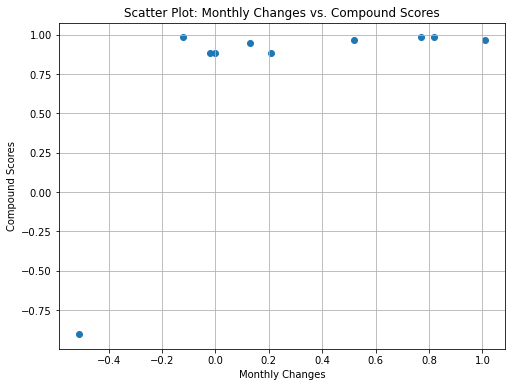

In [57]:
import matplotlib.pyplot as plt

# Extract 'Monthly Changes' and 'Compound Scores' columns
monthly_changes = wipro_weekly['Monthly Changes']
compound_scores = wipro_weekly['Compound Scores']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(monthly_changes, compound_scores, alpha=1)
plt.xlabel('Monthly Changes')
plt.ylabel('Compound Scores')
plt.title('Scatter Plot: Monthly Changes vs. Compound Scores')
plt.grid(True)
plt.show()


## Getting  the Correlation 

In [ ]:
# So according to the scatter plot the pattern is not linear and has a outlier due to which pearsons correlation cannot be used as it sensitive to the outliers 
# in that case we've to use either spearman's rank or kwndall tau rank correlation 

In [47]:
# import pandas as pd

# # Calculate the Pearson correlation coefficient
# pearson_correlation = wipro_weekly['Monthly Changes'].corr(wipro_weekly['Compound Scores'])

# # Print the Pearson correlation coefficient
# print(f"Pearson Correlation: {pearson_correlation:.2f}")


In [117]:
import pandas as pd

# Calculate the Spearman correlation coefficient
spearman_correlation = wipro_weekly['Monthly Changes'].corr(wipro_weekly['Compound Scores'], method='spearman')

# Print the Spearman correlation coefficient
print(f"Spearman Correlation: {spearman_correlation:.2f}")


Spearman Correlation: 0.55


### Visualizing a Heatmap

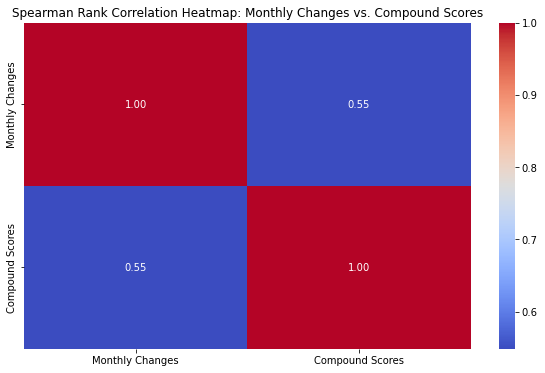

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the Spearman rank correlation matrix
spearman_corr_matrix = wipro_weekly[['Monthly Changes', 'Compound Scores']].corr(method='spearman')

# Create a heatmap
plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Create the heatmap

# Add title
plt.title('Spearman Rank Correlation Heatmap: Monthly Changes vs. Compound Scores')

# Show the plot
plt.show()


## Visualizing a Line Plot 

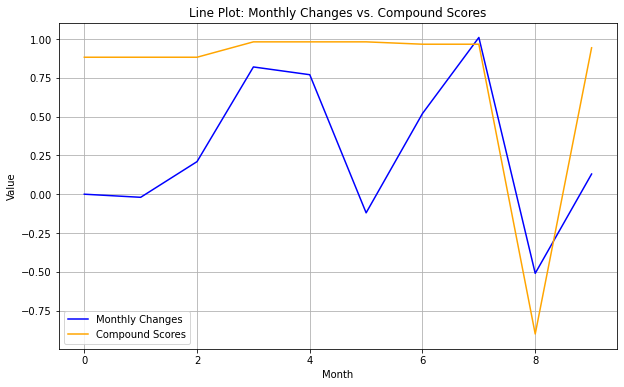

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract 'Monthly Changes' and 'Compound Scores' columns
monthly_changes = wipro_weekly['Monthly Changes']
compound_scores = wipro_weekly['Compound Scores']

# Create a line plot
plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
sns.lineplot(x=monthly_changes.index, y=monthly_changes, label='Monthly Changes', color='blue')
sns.lineplot(x=compound_scores.index, y=compound_scores, label='Compound Scores', color='orange')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Line Plot: Monthly Changes vs. Compound Scores')

# Show legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


# MSI 

## Extracting the stock price data for a specific duration 

In [106]:
msi_weekly = get_data("msi", start_date="01/01/2021", end_date="09/01/2021", index_as_date=True, interval="1mo") #Getting the wipro stock price data  with interval of 1 Month
msi_weekly.reset_index(inplace=True)  #Reseting the index of DataFrame
msi_weekly.rename(columns={'index': 'timestamp'}, inplace=True)   #Renaming the index column of the DataFrame to timestamp
msi_weekly

,timestamp,open,high,low,close,adjclose,volume,ticker
0,2021-01-01,170.639999,177.000000,165.600006,167.550003,161.473373,14066700,MSI
1,2021-02-01,168.669998,184.880005,168.669998,175.479996,169.115799,14061300,MSI
2,2021-03-01,176.729996,190.619995,173.789993,188.050003,181.229889,17230900,MSI
3,2021-04-01,188.330002,192.839996,184.660004,188.300003,182.195450,12944300,MSI
4,2021-05-01,188.779999,206.039993,184.550003,205.309998,198.653961,14700600,MSI
5,2021-06-01,206.220001,217.860001,203.190002,216.850006,209.819885,15409300,MSI
6,2021-07-01,217.600006,225.009995,215.289993,223.919998,217.387650,11222900,MSI
7,2021-08-01,224.860001,244.899994,220.830002,244.220001,237.095428,15609300,MSI


## finding the montly stock price changes and adding a new column to data set 

In [107]:
# Calculate monthly stock price changes
msi_weekly['Monthly Changes'] = msi_weekly['close'].diff().fillna(0)

# Print the DataFrame with weekly changes
print(msi_weekly)


   timestamp        open        high         low       close    adjclose  \
0 2021-01-01  170.639999  177.000000  165.600006  167.550003  161.473373   
1 2021-02-01  168.669998  184.880005  168.669998  175.479996  169.115799   
2 2021-03-01  176.729996  190.619995  173.789993  188.050003  181.229889   
3 2021-04-01  188.330002  192.839996  184.660004  188.300003  182.195450   
4 2021-05-01  188.779999  206.039993  184.550003  205.309998  198.653961   
5 2021-06-01  206.220001  217.860001  203.190002  216.850006  209.819885   
6 2021-07-01  217.600006  225.009995  215.289993  223.919998  217.387650   
7 2021-08-01  224.860001  244.899994  220.830002  244.220001  237.095428   

     volume ticker  Monthly Changes  
0  14066700    MSI         0.000000  
1  14061300    MSI         7.929993  
2  17230900    MSI        12.570007  
3  12944300    MSI         0.250000  
4  14700600    MSI        17.009995  
5  15409300    MSI        11.540009  
6  11222900    MSI         7.069992  
7  15609300

## Extracting the articles using API CAlls

In [108]:
import yfinance as yf

In [109]:
# Import the library


# Choose a ticker symbol
ticker = "MSI"

# Get the ticker object
stock = yf.Ticker(ticker)

# Get the news articles for the ticker
news = stock.news

# Print the titles and links of the articles
for article in news:
    print(article["title"])
    print(article["link"])
    print()

Nokia (NOK) Establishes Advanced 6G Research Facility in India
https://finance.yahoo.com/news/nokia-nok-establishes-advanced-6g-170800151.html

Keysight (KEYS) Solution Boosts Satellite Communication Testing
https://finance.yahoo.com/news/keysight-keys-solution-boosts-satellite-170300345.html

Is AT&T (T) Exploring DirecTV Stake Options for Core Focus?
https://finance.yahoo.com/news/t-t-exploring-directv-stake-125900231.html

Cambium (CMBM) Issues Preliminary Q3 Results, Revenues Down
https://finance.yahoo.com/news/cambium-cmbm-issues-preliminary-q3-125300925.html

Motorola Solutions Foundation Hosts Inaugural Grant Partner Summit on First Responder Wellness
https://finance.yahoo.com/news/motorola-solutions-foundation-hosts-inaugural-203000341.html

What Makes Altice (ATUS) an Enticing Investment Option Now?
https://finance.yahoo.com/news/makes-altice-atus-enticing-investment-140200741.html

Can Intel (INTC) Script Chip Turnaround as a Standalone Entity?
https://finance.yahoo.com/news/

## Getting the senitment scores of each article using VADER LEXICON Model and adding the scores in a column to the data set 

In [110]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Download the NLTK data for sentiment analysis (if not already downloaded)
nltk.download('vader_lexicon')

# Create a SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

# List of article URLs
article_urls = [
    "https://finance.yahoo.com/news/nokia-nok-establishes-advanced-6g-170800151.html",
    "https://finance.yahoo.com/news/keysight-keys-solution-boosts-satellite-170300345.html",
    "https://finance.yahoo.com/news/t-t-exploring-directv-stake-125900231.html",
    "https://finance.yahoo.com/news/cambium-cmbm-issues-preliminary-q3-125300925.html",
    "https://finance.yahoo.com/news/motorola-solutions-foundation-hosts-inaugural-203000341.html",
    "https://finance.yahoo.com/news/makes-altice-atus-enticing-investment-140200741.html",
    "https://finance.yahoo.com/news/intel-intc-script-chip-turnaround-140000284.html",
    "https://finance.yahoo.com/news/interdigital-idcc-iit-kanpur-team-155800856.html",
]

# Create an empty list to store compound scores
compound_scores = []

for article_url in article_urls:
    try:
        # Send an HTTP GET request to fetch the article content
        response = requests.get(article_url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the HTML content of the article using BeautifulSoup
            soup = BeautifulSoup(response.text, 'html.parser')

            # Extract the article text (customize this based on the website's structure)
            article_text = ""

            # Assuming the article content is within paragraph tags, extract and concatenate the text
            paragraphs = soup.find_all('p')
            for paragraph in paragraphs:
                article_text += paragraph.get_text() + "\n"

            # Analyze the sentiment of the article
            sentiment_scores = analyzer.polarity_scores(article_text)
            
            # Append the compound score to the list
            compound_scores.append(sentiment_scores['compound'])

            # Print the sentiment and sentiment scores for the current article
            print("Article URL:", article_url)
            print(f"Sentiment: {sentiment_scores['compound']:.4f}")
            print(f"Positive Score: {sentiment_scores['pos']:.4f}")
            print(f"Negative Score: {sentiment_scores['neg']:.4f}")
            print(f"Neutral Score: {sentiment_scores['neu']:.4f}")
            print()

        else:
            print("Failed to retrieve data. Status code:", response.status_code)

    except Exception as e:
        print("An error occurred:", str(e))

# Add the list of compound scores as a new column to the wipro_weekly DataFrame
msi_weekly['Compound Scores'] = compound_scores

# Print the updated DataFrame
print(msi_weekly)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\salman_mohamm3d\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Article URL: https://finance.yahoo.com/news/nokia-nok-establishes-advanced-6g-170800151.html
Sentiment: 0.9988
Positive Score: 0.1480
Negative Score: 0.0000
Neutral Score: 0.8520

Article URL: https://finance.yahoo.com/news/keysight-keys-solution-boosts-satellite-170300345.html
Sentiment: 0.9990
Positive Score: 0.1700
Negative Score: 0.0050
Neutral Score: 0.8250

Article URL: https://finance.yahoo.com/news/t-t-exploring-directv-stake-125900231.html
Sentiment: 0.9978
Positive Score: 0.1270
Negative Score: 0.0230
Neutral Score: 0.8500

Article URL: https://finance.yahoo.com/news/cambium-cmbm-issues-preliminary-q3-125300925.html
Sentiment: 0.9985
Positive Score: 0.1550
Negative Score: 0.0200
Neutral Score: 0.8250

Article URL: https://finance.yahoo.com/news/motorola-solutions-foundation-hosts-inaugural-203000341.html
Sentiment: 0.9992
Positive Score: 0.2370
Negative Score: 0.0270
Neutral Score: 0.7360

Article URL: https://finance.yahoo.com/news/makes-altice-atus-enticing-investment-14020

## Visualization

## Scatter Plot  

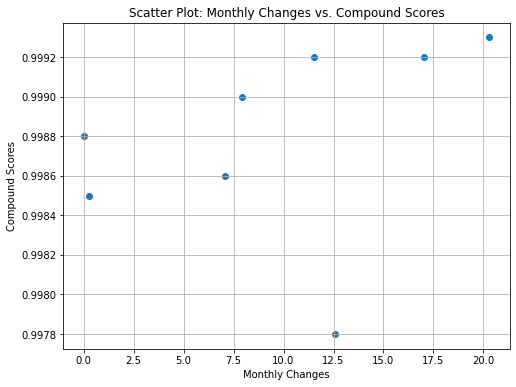

In [111]:
import matplotlib.pyplot as plt

# Extract 'Monthly Changes' and 'Compound Scores' columns
monthly_changes = msi_weekly['Monthly Changes']
compound_scores = msi_weekly['Compound Scores']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(monthly_changes, compound_scores, alpha=1)
plt.xlabel('Monthly Changes')
plt.ylabel('Compound Scores')
plt.title('Scatter Plot: Monthly Changes vs. Compound Scores')
plt.grid(True)
plt.show()


## finding correlation 

In [124]:
import pandas as pd

# Calculate the Spearman correlation coefficient
spearman_correlation = msi_weekly['Monthly Changes'].corr(msi_weekly['Compound Scores'], method='spearman')

# Print the Spearman correlation coefficient
print(f"Spearman Correlation: {spearman_correlation:.2f}")


Spearman Correlation: 0.55


## Visualizing a Heatmap

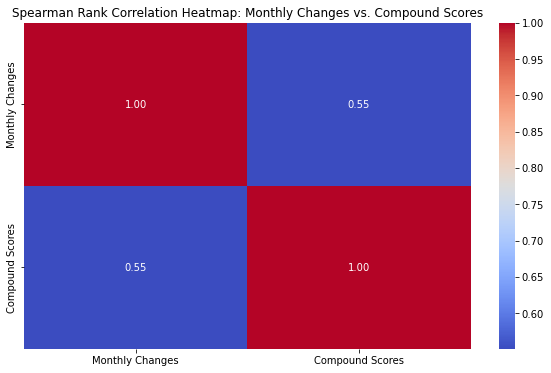

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the Spearman rank correlation matrix
spearman_corr_matrix = msi_weekly[['Monthly Changes', 'Compound Scores']].corr(method='spearman')

# Create a heatmap
plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Create the heatmap

# Add title
plt.title('Spearman Rank Correlation Heatmap: Monthly Changes vs. Compound Scores')

# Show the plot
plt.show()


## Visualizing a Line Plot 

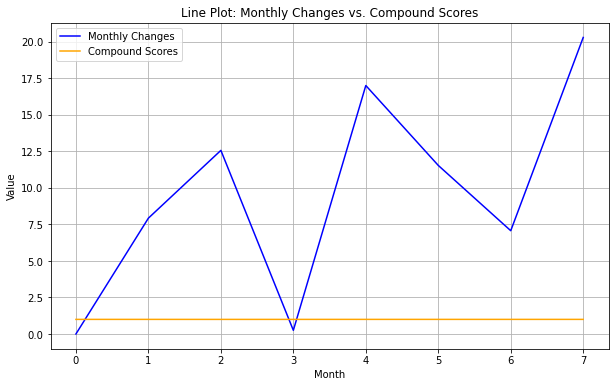

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract 'Monthly Changes' and 'Compound Scores' columns
monthly_changes = msi_weekly['Monthly Changes']
compound_scores = msi_weekly['Compound Scores']

# Create a line plot
plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
sns.lineplot(x=monthly_changes.index, y=monthly_changes, label='Monthly Changes', color='blue')
sns.lineplot(x=compound_scores.index, y=compound_scores, label='Compound Scores', color='orange')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Line Plot: Monthly Changes vs. Compound Scores')

# Show legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
